
# Part 2

In this mini-project you will explore how to design a Bayesian network and explore the impact of design choices on inference.

**Description of the Problem**

- Weather affects our behaviour.
- When it rains we may take an umbrella.
- When its cold we may wear a coat.
- Weather changes with the seasons;
- It is hotter in the summer than in the winter and
- It rains more in the winter than in the summer.

**We may identify five random variables that potentially influence each other:**

- The season (Spring, Summer, Autumn, Winter)
- The temperature (Cold, Mild, Hot)
- Whether it is raining (Raining, Not Raining)
- Wearing a Coat (Coat, No Coat)
- Carrying an Umbrella (Umbrella, No Umbrella)

Large quantities of data have been obtained that have allowed the joint distribution to be estimated. This is provided for you in the accompanying data
file.

The researchers who conducted this study believe that there should be an underlying causal model that would model this data. Your task is to find a Bayesian network model that explains the data.

**Tasks**

Download the file PDF.pickle. Load the file using:

- import numpy as np
- import pickle
- with open('JointPDF.pickle','rb') as handle:
    - pickle.load(handle)

This will import a single numpy array JointPDF[i,j,k,l,m] where the indices correspond to
- i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
- j: Temperature (0: Cold, 1: Mild, 2: Hot)
- k: Rain (0: not raining, 1: raining)
- l: Coat (0: not wearing a coat, 1: wearing a coat)
- m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)

# Task (a)

Suggest three potential Bayesian Networks to model this problem. For each of your suggestions, explain the reasoning behind your choice and evalulate the ability of your chosen factorisation to model the joint distribution.

In [ ]:
import numpy as np
import pickle

with open('JointPDF.pickle', 'rb') as handle:
    JointPDF = pickle.load(handle)

In [ ]:
print(JointPDF)

[[[[[6.4000e-03 1.6000e-03]
    [1.3600e-02 3.4000e-03]]

   [[7.0000e-04 6.3000e-03]
    [1.8000e-03 1.6200e-02]]]


  [[[2.4000e-02 6.0000e-03]
    [2.6000e-02 6.5000e-03]]

   [[3.2500e-03 2.9250e-02]
    [3.0000e-03 2.7000e-02]]]


  [[[2.7600e-02 6.9000e-03]
    [2.4000e-03 6.0000e-04]]

   [[3.3000e-03 2.9700e-02]
    [4.5000e-04 4.0500e-03]]]]



 [[[[3.8400e-03 9.6000e-04]
    [8.1600e-03 2.0400e-03]]

   [[2.8000e-04 2.5200e-03]
    [7.2000e-04 6.4800e-03]]]


  [[[2.3040e-02 5.7600e-03]
    [2.4960e-02 6.2400e-03]]

   [[2.0800e-03 1.8720e-02]
    [1.9200e-03 1.7280e-02]]]


  [[[5.5200e-02 1.3800e-02]
    [4.8000e-03 1.2000e-03]]

   [[4.4000e-03 3.9600e-02]
    [6.0000e-04 5.4000e-03]]]]



 [[[[7.6800e-03 1.9200e-03]
    [1.6320e-02 4.0800e-03]]

   [[1.9600e-03 1.7640e-02]
    [5.0400e-03 4.5360e-02]]]


  [[[1.2960e-02 3.2400e-03]
    [1.4040e-02 3.5100e-03]]

   [[4.0950e-03 3.6855e-02]
    [3.7800e-03 3.4020e-02]]]


  [[[8.2800e-03 2.0700e-03]
    [7.2000e-04 1.8000e-

In [ ]:
print(type(JointPDF))

<class 'numpy.ndarray'>


In [ ]:
# Verify that JointPDF is normalised.

JointPDF.sum()

1.0

In [ ]:
# Factorise into five independent distributions

P_S = JointPDF.sum(axis=(1, 2, 3, 4))
P_T = JointPDF.sum(axis=(0, 2, 3, 4))
P_R = JointPDF.sum(axis=(0, 1, 3, 4))
P_C = JointPDF.sum(axis=(0, 1, 2, 4))
P_U = JointPDF.sum(axis=(0, 1, 2, 3))

print(f"i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)")
print(f"P_S: {P_S.round(2)} \n")

print(f"j: Temperature (0: Cold, 1: Mild, 2: Hot)")
print(f"P_T: {P_T.round(2)} \n")

print(f"k: Rain (0: not raining, 1: raining)")
print(f"P_R: {P_R.round(2)} \n")

print(f"l: Coat (0: not wearing a coat, 1: wearing a coat)")
print(f"P_C: {P_C.round(2)} \n")

print(f"m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)")
print(f"P_U: {P_U.round(2)} \n")

i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
P_S: [0.25 0.25 0.25 0.25] 

j: Temperature (0: Cold, 1: Mild, 2: Hot)
P_T: [0.35 0.4  0.25] 

k: Rain (0: not raining, 1: raining)
P_R: [0.4 0.6] 

l: Coat (0: not wearing a coat, 1: wearing a coat)
P_C: [0.53 0.47] 

m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
P_U: [0.38 0.62] 



## Bayesian Network 1

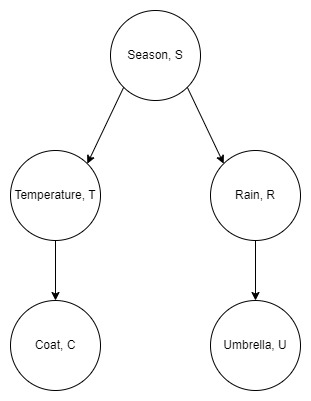

In [ ]:
from IPython.display import Image

Image(filename='BayesianNetwork1.jpg')

$P(S, T, R, C, U) = P(C|T) P(U|R) P(T|S) P(R|S) P(S)$

In [ ]:
# P(C|T)

# j: Temperature (0: Cold, 1: Mild, 2: Hot)
# l: Coat (0: not wearing a coat, 1: wearing a coat)

P_TC = JointPDF.sum(axis=(0, 2, 4))

P_C_T0 = P_TC[0, :] / P_T[0]
P_C_T1 = P_TC[1, :] / P_T[1]
P_C_T2 = P_TC[2, :] / P_T[2]

print(f"P_C_T0: {P_C_T0.round(2)}")
print(f"P_C_T1: {P_C_T1.round(2)}")
print(f"P_C_T2: {P_C_T2.round(2)} \n")

P_C_T = np.array([P_C_T0, P_C_T1, P_C_T2])

print(f"P_C_T:")
print(P_C_T)

P_C_T0: [0.29 0.71]
P_C_T1: [0.5 0.5]
P_C_T2: [0.9 0.1] 

P_C_T:
[[0.292    0.708   ]
 [0.503125 0.496875]
 [0.9002   0.0998  ]]


In [ ]:
# P(U|R)

# k: Rain (0: not raining, 1: raining)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)

P_RU = JointPDF.sum(axis=(0, 1, 3))

P_U_R0 =  P_RU[0, :] / P_R[0]
P_U_R1 =  P_RU[1, :] / P_R[1]

print(f"P_U_R0: {P_U_R0.round(2)}")
print(f"P_U_R1: {P_U_R1.round(2)} \n")

P_U_R = np.array([P_U_R0, P_U_R1])

print(f"P_U_R:")
print(P_U_R)

P_U_R0: [0.8 0.2]
P_U_R1: [0.1 0.9] 

P_U_R:
[[0.8 0.2]
 [0.1 0.9]]


In [ ]:
# P(T|S)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
# j: Temperature (0: Cold, 1: Mild, 2: Hot)

P_ST = JointPDF.sum(axis=(2, 3, 4))

P_T_S0 = P_ST[0, :] / P_S[0]
P_T_S1 = P_ST[1, :] / P_S[1]
P_T_S2 = P_ST[2, :] / P_S[2]
P_T_S3 = P_ST[3, :] / P_S[3]

print(f"P_T_S0: {P_T_S0.round(2)}")
print(f"P_T_S1: {P_T_S1.round(2)}")
print(f"P_T_S2: {P_T_S2.round(2)}")
print(f"P_T_S3: {P_T_S3.round(2)} \n")

P_T_S = np.array([P_T_S0, P_T_S1, P_T_S2, P_T_S3])

print(f"P_T_S:")
print(P_T_S)

P_T_S0: [0.2 0.5 0.3]
P_T_S1: [0.1 0.4 0.5]
P_T_S2: [0.4  0.45 0.15]
P_T_S3: [0.7  0.25 0.05] 

P_T_S:
[[0.2  0.5  0.3 ]
 [0.1  0.4  0.5 ]
 [0.4  0.45 0.15]
 [0.7  0.25 0.05]]


In [ ]:
# P(R|S)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
# k: Rain (0: not raining, 1: raining)

P_SR = JointPDF.sum(axis=(1, 3, 4))

P_R_S0 = P_SR[0, :] / P_S[0]
P_R_S1 = P_SR[1, :] / P_S[1]
P_R_S2 = P_SR[2, :] / P_S[2]
P_R_S3 = P_SR[3, :] / P_S[3]

print(f"P_R_S0: {P_R_S0.round(2)}")
print(f"P_R_S1: {P_R_S1.round(2)}")
print(f"P_R_S2: {P_R_S2.round(2)}")
print(f"P_R_S3: {P_R_S3.round(2)} \n")

P_R_S = np.array([P_R_S0, P_R_S1, P_R_S2, P_R_S3])

print(f"P_R_S:")
print(P_R_S)

P_R_S0: [0.5 0.5]
P_R_S1: [0.6 0.4]
P_R_S2: [0.3 0.7]
P_R_S3: [0.2 0.8] 

P_R_S:
[[0.5 0.5]
 [0.6 0.4]
 [0.3 0.7]
 [0.2 0.8]]


In [ ]:
# Initialize the sum variables
P_STRCU = 0.0

s_values = 4
t_values = 3
r_values = 2
c_values = 2
u_values = 2

# Sum over all possible values of S, T, R, C, U
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                for u in range(u_values):
                    #P(S, T, R, C, U) = P(C|T) P(U|R) P(T|S) P(R|S) P(S)
                    P_STRCU +=  P_C_T[t, c] * P_U_R[r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

print(f"P_STRCU: {P_STRCU.round(2)}")

P_STRCU: 1.0


## Bayesian Network 2

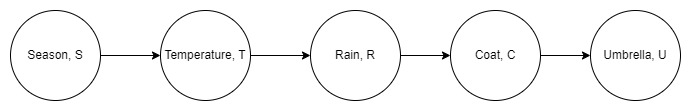

In [ ]:
Image(filename='BayesianNetwork2.jpg')

$P (S, T, R, C, U) = P(U|C) P(C|R) P(R|T) P(T|S) P(S)$

In [ ]:
# P(U|C)

# l: Coat (0: not wearing a coat, 1: wearing a coat)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)

P_CU = JointPDF.sum(axis=(0, 1, 2))

P_U_C0 = P_CU[0, :] / P_C[0]
P_U_C1 = P_CU[1, :] / P_C[1]

print(f"P_U_C0: {P_U_C0.round(2)}")
print(f"P_U_C1: {P_U_C1.round(2)} \n")

P_U_C = np.array([P_U_C0, P_U_C1])

print(f"P_U_C:")
print(P_U_C)

P_U_C0: [0.41 0.59]
P_U_C1: [0.35 0.65] 

P_U_C:
[[0.40562914 0.59437086]
 [0.35127253 0.64872747]]


In [ ]:
# P(C|R)

# k: Rain (0: not raining, 1: raining)
# l: Coat (0: not wearing a coat, 1: wearing a coat)

P_RC = JointPDF.sum(axis=(0, 1, 4))

P_C_R0 = P_RC[0, :] / P_R[0]
P_C_R1 = P_RC[1, :] / P_R[1]

print(f"P_C_R0: {P_C_R0.round(2)}")
print(f"P_C_R1: {P_C_R1.round(2)} \n")

P_C_R = np.array([P_C_R0, P_C_R1])

print(f"P_C_R:")
print(P_C_R)

P_C_R0: [0.58 0.42]
P_C_R1: [0.5 0.5] 

P_C_R:
[[0.576875 0.423125]
 [0.49625  0.50375 ]]


In [ ]:
# P(R|T)

# j: Temperature (0: Cold, 1: Mild, 2: Hot)
# k: Rain (0: not raining, 1: raining)

P_TR = JointPDF.sum(axis=(0, 3, 4))

P_R_T0 = P_TR[0, :] / P_T[0]
P_R_T1 = P_TR[1, :] / P_T[1]
P_R_T2 = P_TR[2, :] / P_T[2]

print(f"P_R_T0: {P_R_T0.round(2)}")
print(f"P_R_T1: {P_R_T1.round(2)}")
print(f"P_R_T2: {P_R_T2.round(2)} \n")

P_R_T = np.array([P_R_T0, P_R_T1, P_R_T2])

print(f"P_R_T:")
print(P_R_T)

P_R_T0: [0.3 0.7]
P_R_T1: [0.42 0.58]
P_R_T2: [0.5 0.5] 

P_R_T:
[[0.3      0.7     ]
 [0.421875 0.578125]
 [0.505    0.495   ]]


In [ ]:
# P(T|S)

print(f"P_T_S:")
print(P_T_S)

P_T_S:
[[0.2  0.5  0.3 ]
 [0.1  0.4  0.5 ]
 [0.4  0.45 0.15]
 [0.7  0.25 0.05]]


In [ ]:
# Initialize the sum variables
P_STRCU = 0.0

s_values = 4
t_values = 3
r_values = 2
c_values = 2
u_values = 2

# Sum over all possible values of S, T, R, C, U
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                for u in range(u_values):
                    # P (S, T, R, C, U) = P(U|C) P(C|R) P(R|T) P(T|S) P(S)
                    P_STRCU +=  P_U_C[c, u] * P_C_R[r, c] * P_R_T[t, r] * P_T_S[s, t] * P_S[s]

print(f"P_STRCU: {P_STRCU.round(2)}")

P_STRCU: 1.0


## Bayesian Network 3

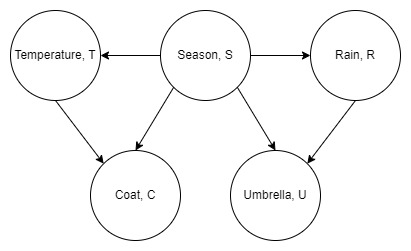

In [ ]:
Image(filename='BayesianNetwork3.jpg')

$P(S, T, R, C, U) = P(C|S,T) P(U|S,R) P(T|S) P(R|S) P(S)$

In [ ]:
# P(C|S,T)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
# j: Temperature (0: Cold, 1: Mild, 2: Hot)
# l: Coat (0: not wearing a coat, 1: wearing a coat)

P_STC = JointPDF.sum(axis=(2, 4))
P_ST = JointPDF.sum(axis=(2, 3, 4))

conditional_probabilities = []

season = 4
temp = 3

for i in range(season):
    for j in range(temp):
        conditional_prob = P_STC[i, j, :] / P_ST[i, j]

        conditional_probabilities.append({
            'Season': i,
            'Temperature': j,
            'Conditional Probabilities': conditional_prob
         })

# Convert to a 3D array
P_C_ST = np.array([result['Conditional Probabilities'] for result in conditional_probabilities])

# Reshape to a 3D array
P_C_ST = P_C_ST.reshape((season, temp, -1))

print(f"P_C_ST:")
print(P_C_ST.round(2))

P_C_ST:
[[[0.3  0.7 ]
  [0.5  0.5 ]
  [0.9  0.1 ]]

 [[0.3  0.7 ]
  [0.5  0.5 ]
  [0.9  0.1 ]]

 [[0.29 0.71]
  [0.51 0.49]
  [0.89 0.11]]

 [[0.29 0.71]
  [0.51 0.49]
  [0.89 0.11]]]


In [ ]:
# P(U|S, R)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
# k: Rain (0: not raining, 1: raining)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)

P_SRU = JointPDF.sum(axis=(1, 3))
P_SR = JointPDF.sum(axis=(1, 3, 4))

conditional_probabilities = []

season = 4
rain = 2

for i in range(season):
    for k in range(rain):
        conditional_prob = P_SRU[i, k, :] / P_SR[i, k]

        conditional_probabilities.append({
            'Season': i,
            'Rain': k,
            'Conditional Probabilities': conditional_prob
        })

# Convert to a 3D array
P_U_SR = np.array([result['Conditional Probabilities'] for result in conditional_probabilities])

# Reshape to a 3D array
P_U_SR = P_U_SR.reshape((season, rain, -1))

print(f"P_U_SR:")
print(P_U_SR)

P_U_SR:
[[[0.8 0.2]
  [0.1 0.9]]

 [[0.8 0.2]
  [0.1 0.9]]

 [[0.8 0.2]
  [0.1 0.9]]

 [[0.8 0.2]
  [0.1 0.9]]]


In [ ]:
# P(T|S)

print(f"P_T_S:")
print(P_T_S)

# P(R|S)

print(f"P_R_S:")
print(P_R_S)

P_T_S:
[[0.2  0.5  0.3 ]
 [0.1  0.4  0.5 ]
 [0.4  0.45 0.15]
 [0.7  0.25 0.05]]
P_R_S:
[[0.5 0.5]
 [0.6 0.4]
 [0.3 0.7]
 [0.2 0.8]]


In [ ]:
# Initialize the sum variables
P_STRCU = 0.0

s_values = 4
t_values = 3
r_values = 2
c_values = 2
u_values = 2

# Sum over all possible values of S, T, R, C, U
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                for u in range(u_values):
                    # P(S, T, R, C, U) = P(C|S,T) P(U|S,R) P(T|S) P(R|S) P(S)
                    P_STRCU +=  P_C_ST[s, t, c] * P_U_SR[s, r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

print(f"P_STRCU: {P_STRCU.round(2)}")

P_STRCU: 1.0


### Task (a): Report

For this problem, 3 Bayesian Network designs were proposed. These networks were design based on realism and possible conditional independence.
<br>

Bayesian Network 1: followed the approach of the given description, where Season directly influence Temperature and Rain. Followed by Temperature influences wearing a Coat and Rain influences carrying an Umbrella.
<br>

Bayesian Network 2: followed the sequential approach, where the variables indirectly influence the others, creating a chain reaction.
<br>

Bayesian Network 3: was designed, where Season directly influences all the other variables. Wearing a Coat and carrying an Umbrella were influenced by 2 conditions each; Season and Temperature for Coat and Season and Rain for Umbrella.
<br>

The probabilities predictions were calculated based on the factorizations to validate the relationships between the variables of the proposed designs.
<br>

During the evalutation of design 2, it was discovered that the relationship between the variables were not strong enough, leading small to no impact upon the outcomes. One good example is Wearing a Coat and Raining.
<br>

It was the same for the design 3. It was discovered that Season does not directly influence our behaviours. Based on the results, people wear their Coats based on the Temperature not the Season. It was the same for carrying an Umbrella which is based on Raining.
<br>

Among the 3 designs, the Bayesian Network 1 is the most promising design by representing only the necessary relationships.
<br>

As demonstrated above, all the proposed designs were able to reproduce the Joint Probability Distribution.

# Task (b)

Choose six inference tasks (for example, computing P(Temperature|Umbrella) and compare the predictions of each of your networks with each other, and with inferences made directly from the joint distribution.

- Investigate different inference methods and compare their results.
- Comment on the computational effort needed to perform each calculation.
- Explain how the design choices made in each network have influenced the results.
- Which design do you think is the best model for the domain?

### Exact Inference P(C|U) - Joint Distribution

In [ ]:
# Does wearing a Coat influenced by carrying an Umbrella? P(C|U)

# l: Coat (0: not wearing a coat, 1: wearing a coat)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)


P_CU = JointPDF.sum(axis=(0, 1, 2))

P_C_U0 = P_CU[:, 0] / P_U[0]
P_C_U1 = P_CU[:, 1] / P_U[1]

print(f"P_C_U0: {P_C_U0.round(2)}")
print(f"P_C_U1: {P_C_U1.round(2)} \n")

P_C_U = np.array([P_C_U0, P_C_U1])

print(f"P_C_U:")
print(P_C_U)

P_C_U0: [0.56 0.44]
P_C_U1: [0.51 0.49] 

P_C_U:
[[0.56414474 0.43585526]
 [0.50665323 0.49334677]]


### Exact Inference - Bayesian Network 1

$P(S, T, R, C, U) = P(C|T) P(U|R) P(T|S) P(R|S) P(S)$

$P(C\vert U) $  <br>

$ = \frac{P(C,U)}{P(U)} $ <br>

$ = \frac{\sum_{S,T,R}P(S,T,R,C,U)}
{\sum_{S,T,R,C}P(S,T,R,C,U)} $ <br>

$ = \frac{\sum_{S,T,R}P(C\vert T)P(U\vert R)P(T\vert S)P(R\vert S)P(S)}
{\sum_{S,T,R,C}P(C\vert T)P(U\vert R)P(T\vert S)P(R\vert S)P(S)}$. <br>

In [ ]:
# Initialize the sum variables
EP_CU = 0.0
EP_U = 0.0

s_values = 4
t_values = 3
r_values = 2

# l: Coat (0: not wearing a coat, 1: wearing a coat)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
c = 0
u = 0

# Sum over all possible values of S, T, R
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            EP_CU += P_C_T[t, c] * P_U_R[r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

c_values = 2

# Sum over all possible values of S, T, R, and C
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                EP_U += P_C_T[t, c] * P_U_R[r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

# Calculate P(C | U) using the formula
EP_C_U = EP_CU / EP_U

print(f"EP_C_U: {EP_C_U.round(2)}")

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

EP_C_U: 0.56


### Exact Inference - Bayesian Network 2

$P (S, T, R, C, U) = P(U|C) P(C|R) P(R|T) P(T|S) P(S)$

$P(C\vert U) $  <br>

$ = \frac{P(C,U)}{P(U)} $ <br>

$ = \frac{\sum_{S,T,R}P(S,T,R,C,U)}
{\sum_{S,T,R,C}P(S,T,R,C,U)} $ <br>

$ = \frac{\sum_{S,T,R}P(U\vert C)P(C\vert R)P(R\vert T)P(T\vert S)P(S)}
{\sum_{S,T,R,C}P(U\vert C)P(C\vert R)P(R\vert T)P(T\vert S)P(S)}$. <br>

In [ ]:
# Initialize the sum variables
EP_CU = 0.0
EP_U = 0.0

s_values = 4
t_values = 3
r_values = 2

# l: Coat (0: not wearing a coat, 1: wearing a coat)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
c = 0
u = 0

# Sum over all possible values of S, T, R
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            EP_CU += P_U_C[c, u] * P_C_R[r, c] * P_R_T[t, r] * P_T_S[s, t] * P_S[s]

c_values = 2

# Sum over all possible values of S, T, R, and C
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                EP_U += P_U_C[c, u] * P_C_R[r, c] * P_R_T[t, r] * P_T_S[s, t] * P_S[s]

# Calculate P(C | U) using the formula
EP_C_U = EP_CU / EP_U

print(f"EP_C_U: {EP_C_U.round(2)}")

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

EP_C_U: 0.56


### Exact Inference - Bayesian Network 3

$P(S, T, R, C, U) = P(C|S,T) P(U|S,R) P(T|S) P(R|S) P(S)$

$P(C\vert U) $  <br>

$ = \frac{P(C,U)}{P(U)} $ <br>

$ = \frac{\sum_{S,T,R}P(S,T,R,C,U)}
{\sum_{S,T,R,C}P(S,T,R,C,U)} $ <br>

$ = \frac{\sum_{S,T,R}P(C\vert S,T)P(U\vert S,R)P(T\vert S)P(R \vert S)P(S)}
{\sum_{S,T,R,C}P(C\vert S,T)P(U\vert S,R)P(T\vert S)P(R \vert S)P(S)}$. <br>

In [ ]:
# Initialize the sum variables
EP_CU = 0.0
EP_U = 0.0

s_values = 4
t_values = 3
r_values = 2

# l: Coat (0: not wearing a coat, 1: wearing a coat)
# m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
c = 0
u = 0

# Sum over all possible values of S, T, R
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            EP_CU += P_C_ST[s, t, c] * P_U_SR[s, r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

c_values = 2

# Sum over all possible values of S, T, R, and C
for s in range(s_values):
    for t in range(t_values):
        for r in range(r_values):
            for c in range(c_values):
                EP_U += P_C_ST[s, t, c] * P_U_SR[s, r, u] * P_T_S[s, t] * P_R_S[s, r] * P_S[s]

# Calculate P(C | U) using the formula
EP_C_U = EP_CU / EP_U

print(f"EP_C_U: {EP_C_U.round(2)}")

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

EP_C_U: 0.56


### Direct Sampling - Joint Distribution

In [ ]:
N = 10000
Trace = np.zeros([N, 5])

# Assuming P_G is an array of probabilities for each possible value of G
for i in range(N):
    S = np.random.choice([0, 1, 2, 3], p=P_S)
    T = np.random.choice([0, 1, 2], p=P_T)
    R = np.random.choice([0, 1], p=P_R)
    C = np.random.choice([0, 1], p=P_C)
    U = np.random.choice([0, 1], p=P_U)
    Trace[i, :] = [S, T, R, C, U]

print(Trace)

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1.]
 [2. 1. 0. 1. 1.]
 ...
 [2. 2. 0. 1. 1.]
 [1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
NP_S = (Trace[:, 0] == 0).sum()  # Count occurrences of Season = 0
print(f"NP_S = {(NP_S/N).round(2)}")

NP_T = (Trace[:, 1] == 0).sum()  # Count occurrences of Temperature = 0
print(f"NP_T = {(NP_T/N).round(2)}")

NP_R = (Trace[:, 2] == 0).sum()  # Count occurrences of Rain = 0
print(f"NP_R = {(NP_R/N).round(2)}")

NP_C = (Trace[:, 3] == 0).sum()  # Count occurrences of Coat = 0
print(f"NP_C = {(NP_C/N).round(2)}")

NP_U = (Trace[:, 4] == 0).sum()  # Count occurrences of Umbrella = 0
print(f"NP_U = {(NP_U/N).round(2)}")

#i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
#P_S: [0.25 0.25 0.25 0.25]

#j: Temperature (0: Cold, 1: Mild, 2: Hot)
#P_T: [0.35 0.4  0.25]

#k: Rain (0: not raining, 1: raining)
#P_R: [0.4 0.6]

#l: Coat (0: not wearing a coat, 1: wearing a coat)
#P_C: [0.53 0.47]

#m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
#P_U: [0.38 0.62]

NP_S = 0.25
NP_T = 0.35
NP_R = 0.39
NP_C = 0.53
NP_U = 0.38


In [ ]:
# Count occurrences of both Coat = 0 and Umbrella = 0
NP_CU = ((Trace[:, 3] == 0) & (Trace[:, 4] == 0)).sum()

# Count occurrences of Umbrella = 0
NP_U = (Trace[:, 4] == 0).sum()

# Calculate P(C|U)
NP_C_U = NP_CU / NP_U

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

print(f"NP_C_U : {NP_C_U.round(2)}")

NP_C_U : 0.53


In [ ]:
# P(R|C)

# k: Rain (0: not raining, 1: raining)
# l: Coat (0: not wearing a coat, 1: wearing a coat)

P_RC = JointPDF.sum(axis=(0, 1, 4))

P_R_C0 = P_RC[:, 0] / P_C[0]
P_R_C1 = P_RC[:, 1] / P_C[1]

print(f"P_R_C0: {P_R_C0.round(2)}")
print(f"P_R_C1: {P_R_C1.round(2)} \n")

P_R_C = np.array([P_R_C0, P_R_C1])

print(f"P_R_C:")
print(P_R_C)

P_R_C0: [0.44 0.56]
P_R_C1: [0.36 0.64] 

P_R_C:
[[0.43661306 0.56338694]
 [0.35896076 0.64103924]]


In [ ]:

# Count occurrences of both Rain = 0 and Coat = 0
NP_RC = ((Trace[:, 2] == 0) & (Trace[:, 3] == 0)).sum()

# Count occurrences of Coat = 0
NP_C = (Trace[:, 3] == 0).sum()

# Calculate P(R|C)
NP_R_C = NP_RC / NP_C

# result of P_R_C calculated directly from JointPDF
#          R = 0 | R = 1
# C = 0  0.44 | 0.56
# C = 1  0.36 | 0.64

print(f"NP_R_C : {NP_R_C.round(2)}")

NP_R_C : 0.39


### Direct Sampling - Bayesian Network 1

$P(S, T, R, C, U) = P(C|T) P(U|R) P(T|S) P(R|S) P(S)$

In [ ]:
N = 10000
Trace = np.zeros([N, 5])

# Assuming P_G is an array of probabilities for each possible value of G
for i in range(N):
    S = np.random.choice([0, 1, 2, 3], p=P_S)
    T = np.random.choice([0, 1, 2], p=P_T_S[S, :])
    R = np.random.choice([0, 1], p=P_R_S[S, :])
    C = np.random.choice([0, 1], p=P_C_T[T, :])
    U = np.random.choice([0, 1], p=P_U_R[R, :])
    Trace[i, :] = [S, T, R, C, U]

print(Trace)

[[2. 1. 0. 0. 0.]
 [0. 2. 1. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [2. 1. 1. 0. 1.]
 [3. 0. 0. 1. 0.]
 [2. 1. 0. 0. 1.]]


In [ ]:
NP_S = (Trace[:, 0] == 0).sum()  # Count occurrences of Season = 0
print(f"NP_S = {(NP_S/N).round(2)}")

NP_T = (Trace[:, 1] == 0).sum()  # Count occurrences of Temperature = 0
print(f"NP_T = {(NP_T/N).round(2)}")

NP_R = (Trace[:, 2] == 0).sum()  # Count occurrences of Rain = 0
print(f"NP_R = {(NP_R/N).round(2)}")

NP_C = (Trace[:, 3] == 0).sum()  # Count occurrences of Coat = 0
print(f"NP_C = {(NP_C/N).round(2)}")

NP_U = (Trace[:, 4] == 0).sum()  # Count occurrences of Umbrella = 0
print(f"NP_U = {(NP_U/N).round(2)}")

#i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
#P_S: [0.25 0.25 0.25 0.25]

#j: Temperature (0: Cold, 1: Mild, 2: Hot)
#P_T: [0.35 0.4  0.25]

#k: Rain (0: not raining, 1: raining)
#P_R: [0.4 0.6]

#l: Coat (0: not wearing a coat, 1: wearing a coat)
#P_C: [0.53 0.47]

#m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
#P_U: [0.38 0.62]

NP_S = 0.25
NP_T = 0.35
NP_R = 0.4
NP_C = 0.53
NP_U = 0.38


In [ ]:
# Count occurrences of both Coat = 0 and Umbrella = 0
NP_CU = ((Trace[:, 3] == 0) & (Trace[:, 4] == 0)).sum()

# Count occurrences of Umbrella = 0
NP_U = (Trace[:, 4] == 0).sum()

# Calculate P(C|U)
NP_C_U = NP_CU / NP_U

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

print(f"NP_C_U : {NP_C_U.round(2)}")

NP_C_U : 0.55


In [ ]:
# P(T|R)

# j: Temperature (0: Cold, 1: Mild, 2: Hot)
# k: Rain (0: not raining, 1: raining)

P_TR = JointPDF.sum(axis=(0, 3, 4))

P_T_R0 = P_TR[:, 0] / P_R[0]
P_T_R1 = P_TR[:, 1] / P_R[1]

print(f"P_T_R0: {P_T_R0.round(2)}")
print(f"P_T_R1: {P_T_R1.round(2)} \n")

P_T_R = np.array([P_T_R0, P_T_R1])

print(f"P_T_R:")
print(P_T_R)

P_T_R0: [0.26 0.42 0.32]
P_T_R1: [0.41 0.39 0.21] 

P_T_R:
[[0.2625     0.421875   0.315625  ]
 [0.40833333 0.38541667 0.20625   ]]


In [ ]:
# Count occurrences of both Temp = 0 and Rain = 0
NP_TR = ((Trace[:, 1] == 0) & (Trace[:, 2] == 0)).sum()

# Count occurrences of Umbrella = 0
NP_R = (Trace[:, 2] == 0).sum()

# Calculate P(T|R)
NP_T_R = NP_TR / NP_R

# result of P_T_R calculated directly from JointPDF
#          T = 0 | T = 1 | T = 2
# R = 0  0.26 | 0.42 | 0.32
# R = 1  0.41 | 0.39 | 0.21

print(f"NP_T_R : {NP_T_R.round(2)}")

NP_T_R : 0.26


### Direct Sampling - Bayesian Network 2

𝑃(𝑆,𝑇,𝑅,𝐶,𝑈)=𝑃(𝑈|𝐶)𝑃(𝐶|𝑅)𝑃(𝑅|𝑇)𝑃(𝑇|𝑆)𝑃(𝑆)


In [ ]:
N = 10000
Trace = np.zeros([N, 5])

# Assuming P_G is an array of probabilities for each possible value of G
for i in range(N):
    S = np.random.choice([0, 1, 2, 3], p=P_S)
    T = np.random.choice([0, 1, 2], p=P_T_S[S, :])
    R = np.random.choice([0, 1], p=P_R_T[T, :])
    C = np.random.choice([0, 1], p=P_C_R[R, :])
    U = np.random.choice([0, 1], p=P_U_C[C, :])
    Trace[i, :] = [S, T, R, C, U]

print(Trace)

[[1. 2. 1. 1. 1.]
 [3. 0. 0. 1. 1.]
 [0. 2. 0. 1. 1.]
 ...
 [3. 0. 1. 1. 1.]
 [1. 2. 0. 0. 0.]
 [1. 2. 0. 0. 1.]]


In [ ]:
NP_S = (Trace[:, 0] == 0).sum()  # Count occurrences of Season = 0
print(f"NP_S = {(NP_S/N).round(2)}")

NP_T = (Trace[:, 1] == 0).sum()  # Count occurrences of Temperature = 0
print(f"NP_T = {(NP_T/N).round(2)}")

NP_R = (Trace[:, 2] == 0).sum()  # Count occurrences of Rain = 0
print(f"NP_R = {(NP_R/N).round(2)}")

NP_C = (Trace[:, 3] == 0).sum()  # Count occurrences of Coat = 0
print(f"NP_C = {(NP_C/N).round(2)}")

NP_U = (Trace[:, 4] == 0).sum()  # Count occurrences of Umbrella = 0
print(f"NP_U = {(NP_U/N).round(2)}")

#i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
#P_S: [0.25 0.25 0.25 0.25]

#j: Temperature (0: Cold, 1: Mild, 2: Hot)
#P_T: [0.35 0.4  0.25]

#k: Rain (0: not raining, 1: raining)
#P_R: [0.4 0.6]

#l: Coat (0: not wearing a coat, 1: wearing a coat)
#P_C: [0.53 0.47]

#m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
#P_U: [0.38 0.62]

NP_S = 0.25
NP_T = 0.35
NP_R = 0.4
NP_C = 0.52
NP_U = 0.38


In [ ]:
# Count occurrences of both Coat = 0 and Umbrella = 0
NP_CU = ((Trace[:, 3] == 0) & (Trace[:, 4] == 0)).sum()

# Count occurrences of Umbrella = 0
NP_U = (Trace[:, 4] == 0).sum()

# Calculate P(C|U)
NP_C_U = NP_CU / NP_U

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

print(f"NP_C_U : {NP_C_U.round(2)}")

NP_C_U : 0.56


In [ ]:
# P(S|T)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
# j: Temperature (0: Cold, 1: Mild, 2: Hot)

P_ST = JointPDF.sum(axis=(2, 3, 4))

P_S_T0 = P_ST[:, 0] / P_T[0]
P_S_T1 = P_ST[:, 1] / P_T[1]
P_S_T2 = P_ST[:, 2] / P_T[2]

print(f"P_S_T0: {P_S_T0.round(2)}")
print(f"P_S_T1: {P_S_T1.round(2)}")
print(f"P_S_T2: {P_S_T2.round(2)} \n")

P_S_T = np.array([P_S_T0, P_S_T1, P_S_T2])

print(f"P_S_T:")
print(P_S_T)

P_S_T0: [0.14 0.07 0.29 0.5 ]
P_S_T1: [0.31 0.25 0.28 0.16]
P_S_T2: [0.3  0.5  0.15 0.05] 

P_S_T:
[[0.14285714 0.07142857 0.28571429 0.5       ]
 [0.3125     0.25       0.28125    0.15625   ]
 [0.3        0.5        0.15       0.05      ]]


In [ ]:
# Count occurrences of both Season = 0 and Temp = 0
NP_ST = ((Trace[:, 0] == 0) & (Trace[:, 1] == 0)).sum()

# Count occurrences of Temp = 0
NP_T = (Trace[:, 1] == 0).sum()

# Calculate P(S|T)
NP_S_T = NP_ST / NP_T

# result of P_S_T calculated directly from JointPDF
#          S = 0 | S = 1 | S = 2 | S = 3
# T = 0  0.14 | 0.07 | 0.29 | 0.5
# T = 1  0.31 | 0.25 | 0.28 | 0.16
# T = 2  0.3  | 0.5 | 0.15 | 0.05

print(f"NP_S_T : {NP_S_T.round(2)}")

NP_S_T : 0.13


### Direct Sampling - Bayesian Network 3

$P(S, T, R, C, U) = P(C|S,T) P(U|S,R) P(T|S) P(R|S) P(S)$

In [ ]:
N = 10000
Trace = np.zeros([N, 5])

# Assuming P_G is an array of probabilities for each possible value of G
for i in range(N):
    S = np.random.choice([0, 1, 2, 3], p=P_S)
    T = np.random.choice([0, 1, 2], p=P_T_S[S, :])
    R = np.random.choice([0, 1], p=P_R_S[S, :])
    C = np.random.choice([0, 1], p=P_C_ST[S, T, :])
    U = np.random.choice([0, 1], p=P_U_SR[S, R, :])
    Trace[i, :] = [S, T, R, C, U]

print(Trace)

[[1. 2. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 2. 1. 0. 1.]
 ...
 [3. 0. 1. 1. 1.]
 [2. 1. 1. 0. 1.]
 [3. 0. 1. 0. 1.]]


In [ ]:
NP_S = (Trace[:, 0] == 0).sum()  # Count occurrences of Season = 0
print(f"NP_S = {(NP_S/N).round(2)}")

NP_T = (Trace[:, 1] == 0).sum()  # Count occurrences of Temperature = 0
print(f"NP_T = {(NP_T/N).round(2)}")

NP_R = (Trace[:, 2] == 0).sum()  # Count occurrences of Rain = 0
print(f"NP_R = {(NP_R/N).round(2)}")

NP_C = (Trace[:, 3] == 0).sum()  # Count occurrences of Coat = 0
print(f"NP_C = {(NP_C/N).round(2)}")

NP_U = (Trace[:, 4] == 0).sum()  # Count occurrences of Umbrella = 0
print(f"NP_U = {(NP_U/N).round(2)}")

#i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
#P_S: [0.25 0.25 0.25 0.25]

#j: Temperature (0: Cold, 1: Mild, 2: Hot)
#P_T: [0.35 0.4  0.25]

#k: Rain (0: not raining, 1: raining)
#P_R: [0.4 0.6]

#l: Coat (0: not wearing a coat, 1: wearing a coat)
#P_C: [0.53 0.47]

#m: Umbrella (0: not carrying an umbrella, 1: carrying an umbrella)
#P_U: [0.38 0.62]

NP_S = 0.26
NP_T = 0.34
NP_R = 0.41
NP_C = 0.53
NP_U = 0.39


In [ ]:
# Count occurrences of both Coat = 0 and Umbrella = 0
NP_CU = ((Trace[:, 3] == 0) & (Trace[:, 4] == 0)).sum()

# Count occurrences of Umbrella = 0
NP_U = (Trace[:, 4] == 0).sum()

# Calculate P(C|U)
NP_C_U = NP_CU / NP_U

# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

print(f"NP_C_U : {NP_C_U.round(2)}")

NP_C_U : 0.56


In [ ]:
# P(S|R)

# i: Seasons (0: Spring, 1: Summer, 2: Autumn, 3: Winter)
#k: Rain (0: not raining, 1: raining)

P_SR = JointPDF.sum(axis=(1, 3, 4))

P_S_R0 = P_SR[:, 0] / P_R[0]
P_S_R1 = P_SR[:, 1] / P_R[1]

print(f"P_S_R0: {P_S_R0.round(2)}")
print(f"P_S_R1: {P_S_R1.round(2)} \n")

P_S_R = np.array([P_S_R0, P_S_R1])

print(f"P_S_R:")
print(P_S_R)

P_S_R0: [0.31 0.38 0.19 0.13]
P_S_R1: [0.21 0.17 0.29 0.33] 

P_S_R:
[[0.3125     0.375      0.1875     0.125     ]
 [0.20833333 0.16666667 0.29166667 0.33333333]]


In [ ]:
# Count occurrences of both Season = 0 and Rain = 0
NP_SR = ((Trace[:, 0] == 0) & (Trace[:, 2] == 0)).sum()

# Count occurrences of Temp = 0
NP_R = (Trace[:, 2] == 0).sum()

# Calculate P(S|R)
NP_S_R = NP_SR / NP_R

# result of P_S_R calculated directly from JointPDF
#          S = 0 | S = 1 | S = 2 | S = 3
# R = 0  0.31 | 0.38 | 0.19 | 0.13
# R = 1  0.21 | 0.17 | 0.29 | 0.33

print(f"NP_S_R : {NP_S_R.round(2)}")

NP_S_R : 0.32


In [ ]:
!pip install mkl-service

In [ ]:
!pip install pymc3

In [ ]:
import pymc3 as pm

### MCMC - Joint Distribution

/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
<ipython-input-50-797b08edc37a>:11: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(traceJD)
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will retur

array([[<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Season'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'Coat'}>,
        <Axes: title={'center': 'Coat'}>],
       [<Axes: title={'center': 'Umbrella'}>,
        <Axes: title={'center': 'Umbrella'}>]], dtype=object)

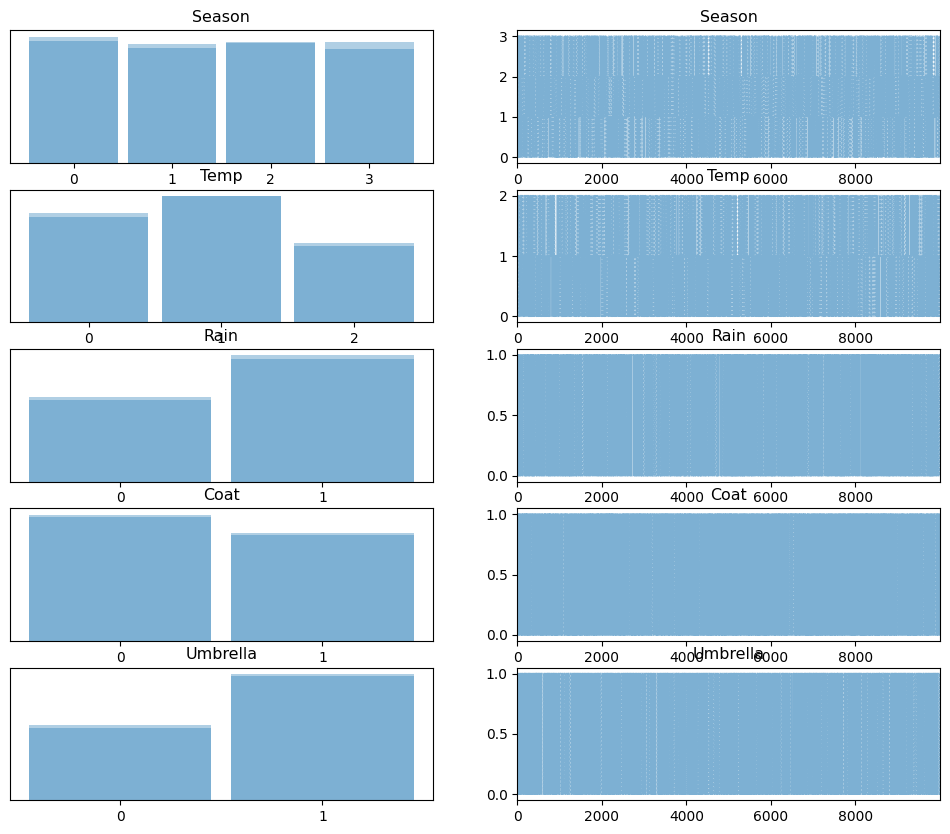

In [ ]:
with pm.Model() as model:
  Season = pm.Categorical('Season', p = P_S)
  Temp = pm.Categorical('Temp', p = P_T)
  Rain = pm.Categorical('Rain', p = P_R)
  Coat = pm.Categorical('Coat', p = P_C)
  Umbrella = pm.Categorical('Umbrella', p = P_U)

  step = pm.Metropolis()
  traceJD = pm.sample(10000, step=step, tune=5000, random_seed=123, progressbar=True)

pm.traceplot(traceJD)

In [ ]:
for t in traceJD:
  print(t)

Streaming output truncated to the last 5000 lines.
{'Season': 2, 'Temp': 0, 'Rain': 0, 'Coat': 1, 'Umbrella': 1}
{'Season': 2, 'Temp': 0, 'Rain': 1, 'Coat': 1, 'Umbrella': 1}
{'Season': 2, 'Temp': 0, 'Rain': 1, 'Coat': 1, 'Umbrella': 1}
{'Season': 0, 'Temp': 0, 'Rain': 0, 'Coat': 1, 'Umbrella': 1}
{'Season': 0, 'Temp': 0, 'Rain': 0, 'Coat': 1, 'Umbrella': 1}
{'Season': 2, 'Temp': 1, 'Rain': 0, 'Coat': 0, 'Umbrella': 1}
{'Season': 1, 'Temp': 1, 'Rain': 1, 'Coat': 0, 'Umbrella': 1}
{'Season': 3, 'Temp': 1, 'Rain': 1, 'Coat': 0, 'Umbrella': 1}
{'Season': 2, 'Temp': 1, 'Rain': 0, 'Coat': 1, 'Umbrella': 1}
{'Season': 2, 'Temp': 0, 'Rain': 1, 'Coat': 0, 'Umbrella': 1}
{'Season': 2, 'Temp': 0, 'Rain': 1, 'Coat': 1, 'Umbrella': 0}
{'Season': 1, 'Temp': 1, 'Rain': 1, 'Coat': 1, 'Umbrella': 0}
{'Season': 1, 'Temp': 0, 'Rain': 1, 'Coat': 1, 'Umbrella': 0}
{'Season': 1, 'Temp': 0, 'Rain': 1, 'Coat': 0, 'Umbrella': 0}
{'Season': 0, 'Temp': 0, 'Rain': 1, 'Coat': 0, 'Umbrella': 0}
{'Season': 0, 'Temp

In [ ]:
import pandas as pd

In [ ]:
dfJD = pm.trace_to_dataframe(traceJD)
dfJD.head()

Season  Temp  Rain  Coat  Umbrella
0       3     1     1     1         1
1       3     2     1     1         1
2       3     0     1     1         1
3       1     1     1     1         1
4       3     1     1     1         1

In [ ]:
# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

MP_C_U = float(dfJD[(dfJD['Coat'] == 0) & (dfJD['Umbrella'] == 0)].shape[0]) / dfJD[dfJD['Umbrella'] == 0].shape[0]

print(f"MP_C_U: {round(MP_C_U, 2)}")

MP_C_U: 0.55


In [ ]:
# result of P_R_C calculated directly from JointPDF
#          R = 0 | R = 1
# C = 0  0.44 | 0.56
# C = 1  0.36 | 0.64

MP_R_C = float(dfJD[(dfJD['Rain'] == 0) & (dfJD['Coat'] == 0)].shape[0]) / dfJD[dfJD['Coat'] == 0].shape[0]

print(f"MP_R_C: {round(MP_R_C, 2)}")

MP_R_C: 0.4


### MCMC - Bayesian Network 1

$P(S, T, R, C, U) = P(C|T) P(U|R) P(T|S) P(R|S) P(S)$

In [ ]:
import theano.tensor as tt

/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-57-5c2d86184b08>:47: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace1)
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently Fals

array([[<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Season'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Umbrella'}>,
        <Axes: title={'center': 'Umbrella'}>],
       [<Axes: title={'center': 'Coat'}>,
        <Axes: title={'center': 'Coat'}>],
       [<Axes: title={'center': 'MP_R_S'}>,
        <Axes: title={'center': 'MP_R_S'}>],
       [<Axes: title={'center': 'MP_T_S'}>,
        <Axes: title={'center': 'MP_T_S'}>],
       [<Axes: title={'center': 'MP_U_R'}>,
        <Axes: title={'center': 'MP_U_R'}>],
       [<Axes: title={'center': 'MP_C_T'}>,
        <Axes: title={'center': 'MP_C_T'}>]], dtype=object)

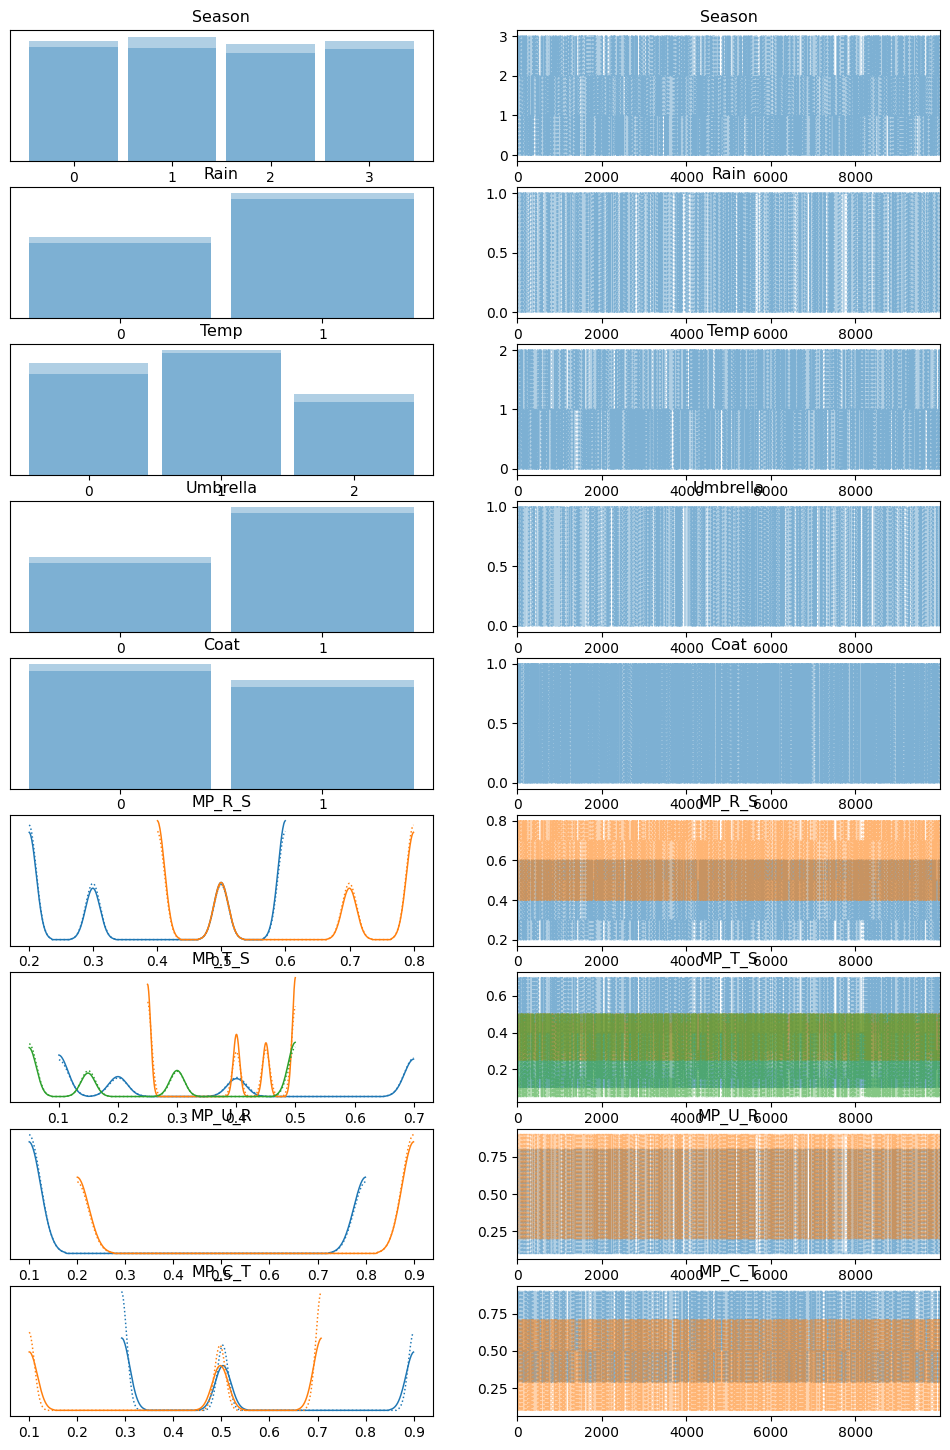

In [ ]:
with pm.Model() as model:

    # P(S)
    Season = pm.Categorical('Season', p=P_S)

    # theano.tensor.eq for conditionals
    Season0 = tt.eq(Season, 0)
    Season1 = tt.eq(Season, 1)
    Season2 = tt.eq(Season, 2)
    Season3 = tt.eq(Season, 3)

    # P(R|S)
    MP_R_S = pm.Deterministic('MP_R_S', pm.math.switch(Season0, P_R_S0,
                        pm.math.switch(Season1, P_R_S1,
                            pm.math.switch(Season2, P_R_S2,
                                P_R_S3))))
    Rain = pm.Categorical('Rain', p=MP_R_S)

    # P(T|S)
    MP_T_S = pm.Deterministic('MP_T_S', pm.math.switch(Season0, P_T_S0,
                        pm.math.switch(Season1, P_T_S1,
                            pm.math.switch(Season2, P_T_S2,
                                P_T_S3))))
    Temp = pm.Categorical('Temp', p=MP_T_S)

    # P(U|R)
    Rain0 = tt.eq(Rain, 0)
    Rain1 = tt.eq(Rain, 1)

    MP_U_R = pm.Deterministic('MP_U_R', pm.math.switch(Rain0, P_U_R0,
                              P_U_R1))
    Umbrella = pm.Categorical('Umbrella', p=MP_U_R)

    # P(C|T)
    Temp0 = tt.eq(Temp, 0)
    Temp1 = tt.eq(Temp, 1)
    Temp2 = tt.eq(Temp, 2)

    MP_C_T = pm.Deterministic('MP_C_T', pm.math.switch(Temp0, P_C_T0,
                         pm.math.switch(Temp1, P_C_T1,
                              P_C_T2)))
    Coat = pm.Categorical('Coat', MP_C_T)

    step = pm.Metropolis()
    trace1 = pm.sample(10000, step=step, tune=5000, random_seed=123, progressbar=True)

pm.traceplot(trace1)

In [ ]:
for t in trace1:
  print(t)

Streaming output truncated to the last 5000 lines.
{'Season': 1, 'Rain': 1, 'Temp': 1, 'Umbrella': 1, 'Coat': 0, 'MP_R_S': array([0.6, 0.4]), 'MP_T_S': array([0.1, 0.4, 0.5]), 'MP_U_R': array([0.1, 0.9]), 'MP_C_T': array([0.503125, 0.496875])}
{'Season': 3, 'Rain': 1, 'Temp': 1, 'Umbrella': 1, 'Coat': 0, 'MP_R_S': array([0.2, 0.8]), 'MP_T_S': array([0.7 , 0.25, 0.05]), 'MP_U_R': array([0.1, 0.9]), 'MP_C_T': array([0.503125, 0.496875])}
{'Season': 3, 'Rain': 1, 'Temp': 1, 'Umbrella': 1, 'Coat': 0, 'MP_R_S': array([0.2, 0.8]), 'MP_T_S': array([0.7 , 0.25, 0.05]), 'MP_U_R': array([0.1, 0.9]), 'MP_C_T': array([0.503125, 0.496875])}
{'Season': 3, 'Rain': 1, 'Temp': 2, 'Umbrella': 0, 'Coat': 0, 'MP_R_S': array([0.2, 0.8]), 'MP_T_S': array([0.7 , 0.25, 0.05]), 'MP_U_R': array([0.1, 0.9]), 'MP_C_T': array([0.9002, 0.0998])}
{'Season': 3, 'Rain': 0, 'Temp': 2, 'Umbrella': 0, 'Coat': 0, 'MP_R_S': array([0.2, 0.8]), 'MP_T_S': array([0.7 , 0.25, 0.05]), 'MP_U_R': array([0.8, 0.2]), 'MP_C_T': array

In [ ]:
df1 = pm.trace_to_dataframe(trace1)
df1.head()

Season  Rain  Temp  Umbrella  Coat  MP_R_S__0  MP_R_S__1  MP_T_S__0  \
0       3     1     0         1     1        0.2        0.8        0.7   
1       3     1     0         1     1        0.2        0.8        0.7   
2       3     1     0         1     0        0.2        0.8        0.7   
3       3     1     0         1     1        0.2        0.8        0.7   
4       3     1     0         1     1        0.2        0.8        0.7   

   MP_T_S__1  MP_T_S__2  MP_U_R__0  MP_U_R__1  MP_C_T__0  MP_C_T__1  
0       0.25       0.05        0.1        0.9      0.292      0.708  
1       0.25       0.05        0.1        0.9      0.292      0.708  
2       0.25       0.05        0.1        0.9      0.292      0.708  
3       0.25       0.05        0.1        0.9      0.292      0.708  
4       0.25       0.05        0.1        0.9      0.292      0.708

In [ ]:
# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

MP_C_U = float(df1[(df1['Coat'] == 0) & (df1['Umbrella'] == 0)].shape[0]) / df1[df1['Umbrella'] == 0].shape[0]

print(f"MP_C_U: {round(MP_C_U, 2)}")

MP_C_U: 0.56


In [ ]:
# result of P_T_R calculated directly from JointPDF
#          T = 0 | T = 1 | T = 2
# R = 0  0.26 | 0.42 | 0.32
# R = 1  0.41 | 0.39 | 0.21

MP_T_R = float(df1[(df1['Temp'] == 0) & (df1['Rain'] == 0)].shape[0]) / df1[df1['Rain'] == 0].shape[0]

print(f"MP_T_R: {round(MP_T_R, 2)}")

MP_T_R: 0.25


### MCMC - Bayesian Network 2

$P (S, T, R, C, U) = P(U|C) P(C|R) P(R|T) P(T|S) P(S)$

/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-62-94b052078937>:49: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace2)
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Season'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'Coat'}>,
        <Axes: title={'center': 'Coat'}>],
       [<Axes: title={'center': 'Umbrella'}>,
        <Axes: title={'center': 'Umbrella'}>],
       [<Axes: title={'center': 'MP_T_S'}>,
        <Axes: title={'center': 'MP_T_S'}>],
       [<Axes: title={'center': 'MP_R_T'}>,
        <Axes: title={'center': 'MP_R_T'}>],
       [<Axes: title={'center': 'MP_C_R'}>,
        <Axes: title={'center': 'MP_C_R'}>],
       [<Axes: title={'center': 'MP_U_C'}>,
        <Axes: title={'center': 'MP_U_C'}>]], dtype=object)

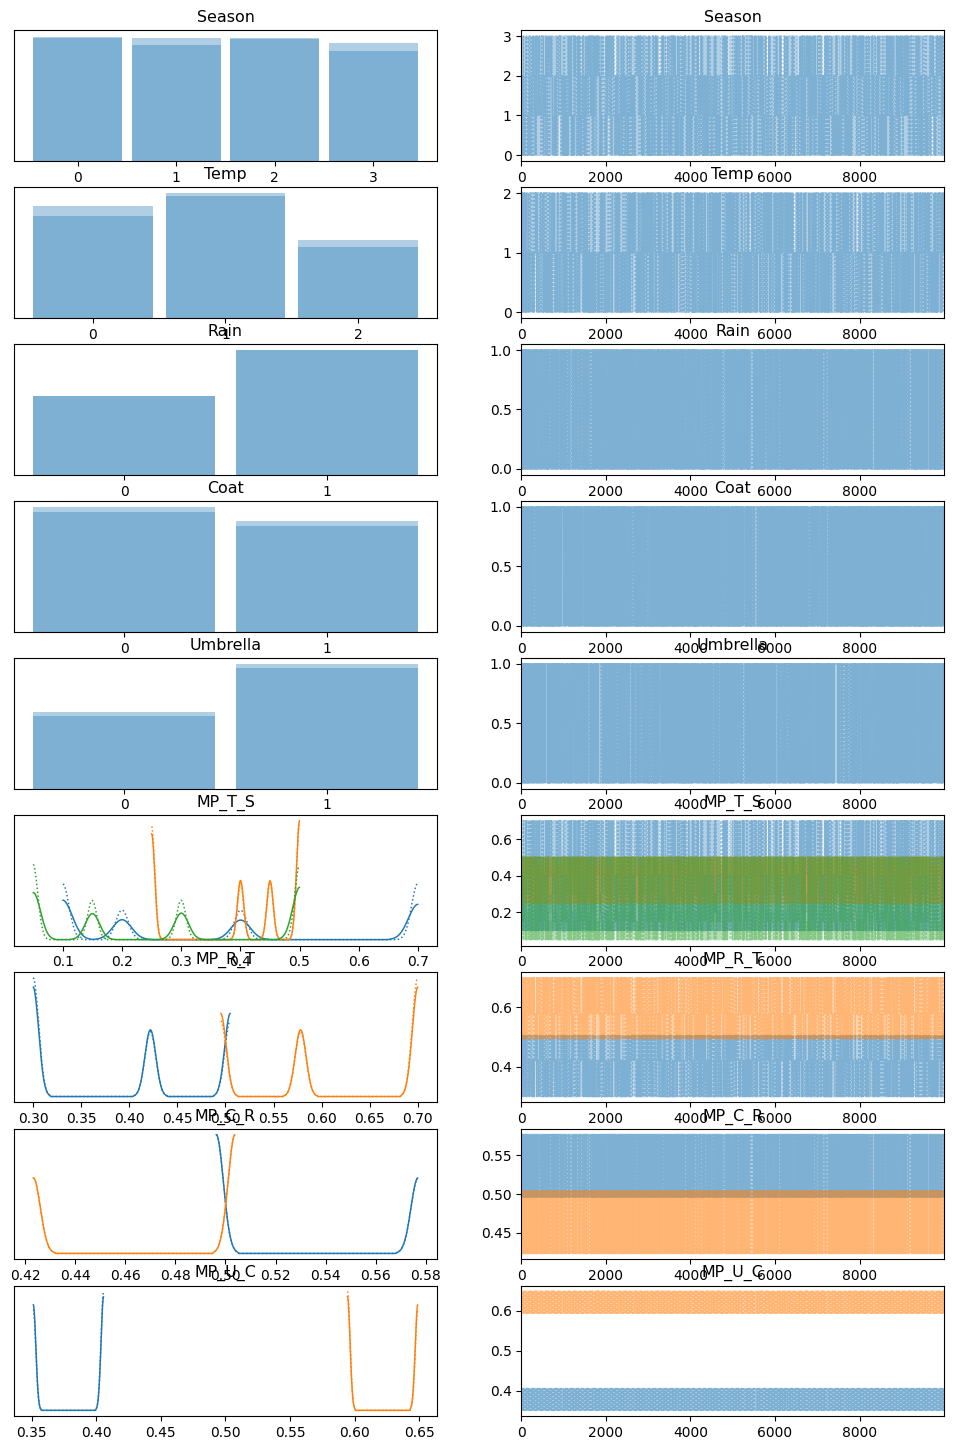

In [ ]:
with pm.Model() as model:

    # P(S)
    Season = pm.Categorical('Season', p=P_S)

    # theano.tensor.eq for conditionals
    Season0 = tt.eq(Season, 0)
    Season1 = tt.eq(Season, 1)
    Season2 = tt.eq(Season, 2)
    Season3 = tt.eq(Season, 3)

    # P(T|S)
    MP_T_S = pm.Deterministic('MP_T_S', pm.math.switch(Season0, P_T_S0,
                        pm.math.switch(Season1, P_T_S1,
                            pm.math.switch(Season2, P_T_S2,
                                P_T_S3))))
    Temp = pm.Categorical('Temp', p=MP_T_S)

    # P(R|T)
    Temp0 = tt.eq(Temp, 0)
    Temp1 = tt.eq(Temp, 1)
    Temp2 = tt.eq(Temp, 2)

    MP_R_T = pm.Deterministic('MP_R_T', pm.math.switch(Temp0, P_R_T0,
                        pm.math.switch(Temp1, P_R_T1,
                              P_R_T2)))
    Rain = pm.Categorical('Rain', p=MP_R_T)

    # P(C|R)
    Rain0 = tt.eq(Rain, 0)
    Rain1 = tt.eq(Rain, 1)

    MP_C_R = pm.Deterministic('MP_C_R', pm.math.switch(Rain0, P_C_R0,
                              P_C_R1))
    Coat = pm.Categorical('Coat', p=MP_C_R)

    # P(U|C)

    Coat0 = tt.eq(Coat, 0)
    Coat1 = tt.eq(Coat, 1)

    MP_U_C = pm.Deterministic('MP_U_C', pm.math.switch(Coat0, P_U_C0,
                            P_U_C1))
    Umbrella = pm.Categorical('Umbrella', MP_U_C)

    step = pm.Metropolis()
    trace2 = pm.sample(10000, step=step, tune=5000, random_seed=123, progressbar=True)

pm.traceplot(trace2)

In [ ]:
for t in trace2:
  print(t)

Streaming output truncated to the last 5000 lines.
{'Season': 0, 'Temp': 2, 'Rain': 1, 'Coat': 1, 'Umbrella': 0, 'MP_T_S': array([0.2, 0.5, 0.3]), 'MP_R_T': array([0.505, 0.495]), 'MP_C_R': array([0.49625, 0.50375]), 'MP_U_C': array([0.35127253, 0.64872747])}
{'Season': 0, 'Temp': 2, 'Rain': 1, 'Coat': 1, 'Umbrella': 1, 'MP_T_S': array([0.2, 0.5, 0.3]), 'MP_R_T': array([0.505, 0.495]), 'MP_C_R': array([0.49625, 0.50375]), 'MP_U_C': array([0.35127253, 0.64872747])}
{'Season': 0, 'Temp': 2, 'Rain': 1, 'Coat': 1, 'Umbrella': 1, 'MP_T_S': array([0.2, 0.5, 0.3]), 'MP_R_T': array([0.505, 0.495]), 'MP_C_R': array([0.49625, 0.50375]), 'MP_U_C': array([0.35127253, 0.64872747])}
{'Season': 0, 'Temp': 2, 'Rain': 1, 'Coat': 1, 'Umbrella': 1, 'MP_T_S': array([0.2, 0.5, 0.3]), 'MP_R_T': array([0.505, 0.495]), 'MP_C_R': array([0.49625, 0.50375]), 'MP_U_C': array([0.35127253, 0.64872747])}
{'Season': 0, 'Temp': 2, 'Rain': 0, 'Coat': 1, 'Umbrella': 1, 'MP_T_S': array([0.2, 0.5, 0.3]), 'MP_R_T': array([

In [ ]:
df2 = pm.trace_to_dataframe(trace2)
df2.head()

Season  Temp  Rain  Coat  Umbrella  MP_T_S__0  MP_T_S__1  MP_T_S__2  \
0       1     2     1     0         1        0.1        0.4        0.5   
1       1     2     0     0         1        0.1        0.4        0.5   
2       1     1     0     0         1        0.1        0.4        0.5   
3       1     1     0     0         1        0.1        0.4        0.5   
4       1     1     0     0         0        0.1        0.4        0.5   

   MP_R_T__0  MP_R_T__1  MP_C_R__0  MP_C_R__1  MP_U_C__0  MP_U_C__1  
0   0.505000   0.495000   0.496250   0.503750   0.405629   0.594371  
1   0.505000   0.495000   0.576875   0.423125   0.405629   0.594371  
2   0.421875   0.578125   0.576875   0.423125   0.405629   0.594371  
3   0.421875   0.578125   0.576875   0.423125   0.405629   0.594371  
4   0.421875   0.578125   0.576875   0.423125   0.405629   0.594371

In [ ]:
# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

MP_C_U = float(df2[(df2['Coat'] == 0) & (df2['Umbrella'] == 0)].shape[0]) / df2[df2['Umbrella'] == 0].shape[0]

print(f"MP_C_U: {round(MP_C_U, 2)}")

MP_C_U: 0.57


In [ ]:
# result of P_S_T calculated directly from JointPDF
#          S = 0 | S = 1 | S = 2 | S = 3
# T = 0  0.14 | 0.07 | 0.29 | 0.5
# T = 1  0.31 | 0.25 | 0.28 | 0.16
# T = 2  0.3  | 0.5 | 0.15 | 0.05

MP_S_T = float(df2[(df2['Season'] == 0) & (df2['Temp'] == 0)].shape[0]) / df2[df2['Temp'] == 0].shape[0]

print(f"MP_S_T: {round(MP_S_T, 2)}")

MP_S_T: 0.15


### MCMC - Bayesian Network 3

$P(S, T, R, C, U) = P(C|S,T) P(U|S,R) P(T|S) P(R|S) P(S)$

/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
<ipython-input-67-d577aa3b014e>:42: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace3)
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.10/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Season'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'Rain'}>],
       [<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'Coat'}>,
        <Axes: title={'center': 'Coat'}>],
       [<Axes: title={'center': 'Umbrella'}>,
        <Axes: title={'center': 'Umbrella'}>],
       [<Axes: title={'center': 'P_R_S'}>,
        <Axes: title={'center': 'P_R_S'}>],
       [<Axes: title={'center': 'P_T_S'}>,
        <Axes: title={'center': 'P_T_S'}>]], dtype=object)

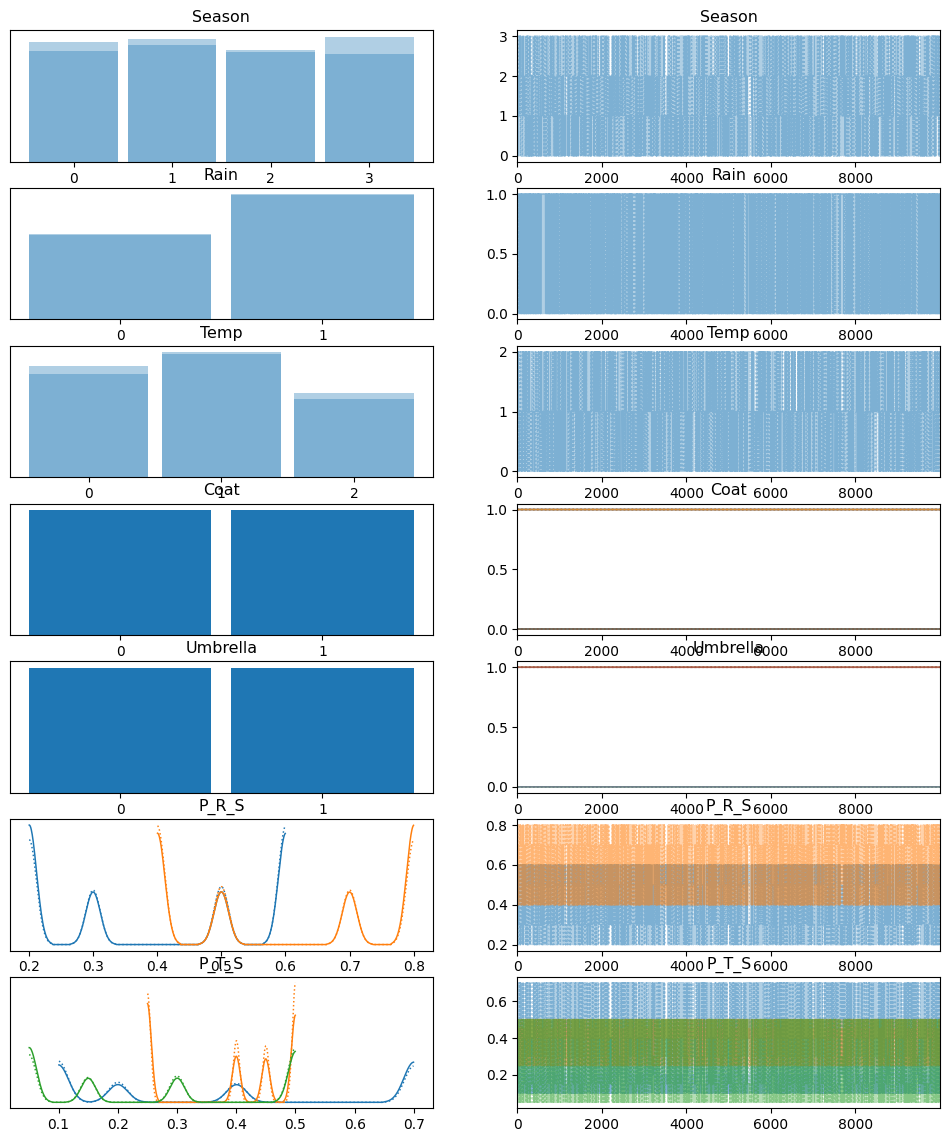

In [ ]:
with pm.Model() as model:

    # P(S)
    Season = pm.Categorical('Season', p=P_S)

    # theano.tensor.eq for conditionals
    Season0 = tt.eq(Season, 0)
    Season1 = tt.eq(Season, 1)
    Season2 = tt.eq(Season, 2)
    Season3 = tt.eq(Season, 3)

    # P(R|S)
    P_R_S = pm.Deterministic('P_R_S', pm.math.switch(Season0, P_R_S0,
                        pm.math.switch(Season1, P_R_S1,
                            pm.math.switch(Season2, P_R_S2,
                                P_R_S3))))
    Rain = pm.Categorical('Rain', p=P_R_S)

    # P(T|S)
    P_T_S = pm.Deterministic('P_T_S', pm.math.switch(Season0, P_T_S0,
                        pm.math.switch(Season1, P_T_S1,
                            pm.math.switch(Season2, P_T_S2,
                                P_T_S3))))
    Temp = pm.Categorical('Temp', p=P_T_S)

    # P(C|S,T)
    S_dim = 4
    T_dim = 3
    C_dim = 2

    Coat = pm.Categorical('Coat', p=P_C_ST, shape=(C_dim, S_dim, T_dim))

    # P(U|S, R)
    R_dim = 2
    U_dim = 2

    Umbrella = pm.Categorical('Umbrella', p=P_U_SR, shape=(U_dim, S_dim, R_dim))

    step = pm.Metropolis()
    trace3 = pm.sample(10000, step=step, tune=5000, random_seed=123, progressbar=True)

pm.traceplot(trace3)

In [ ]:
print(P_C_ST)

[[[0.3   0.7  ]
  [0.5   0.5  ]
  [0.9   0.1  ]]

 [[0.304 0.696]
  [0.496 0.504]
  [0.904 0.096]]

 [[0.292 0.708]
  [0.508 0.492]
  [0.892 0.108]]

 [[0.288 0.712]
  [0.512 0.488]
  [0.888 0.112]]]


In [ ]:
for t in trace3:
  print(t)

Streaming output truncated to the last 5000 lines.
        [0, 1],
        [0, 1]]]), 'P_R_S': array([0.3, 0.7]), 'P_T_S': array([0.4 , 0.45, 0.15])}
{'Season': 2, 'Rain': 1, 'Temp': 0, 'Coat': array([[[1, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 0, 0]]]), 'Umbrella': array([[[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]]]), 'P_R_S': array([0.3, 0.7]), 'P_T_S': array([0.4 , 0.45, 0.15])}
{'Season': 2, 'Rain': 1, 'Temp': 0, 'Coat': array([[[1, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 0, 0]]]), 'Umbrella': array([[[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1]]]), 'P_R_S': array([0.3, 0.7]), 'P_T_S': array([0.4 , 0.45, 0.15])}
{'Season': 2, 'Rain': 1, 'Temp

In [ ]:
df3 = pm.trace_to_dataframe(trace3)
df3.head()

Season  Rain  Temp  Coat__0_0_0  Coat__0_0_1  Coat__0_0_2  Coat__0_1_0  \
0       3     1     0            1            0            0            1   
1       2     1     0            1            0            0            1   
2       2     1     0            1            0            0            1   
3       0     1     0            1            0            0            1   
4       0     0     1            1            0            0            1   

   Coat__0_1_1  Coat__0_1_2  Coat__0_2_0  ...  Umbrella__1_1_1  \
0            1            0            1  ...                1   
1            1            0            1  ...                1   
2            1            0            1  ...                1   
3            1            0            1  ...                1   
4            1            0            1  ...                1   

   Umbrella__1_2_0  Umbrella__1_2_1  Umbrella__1_3_0  Umbrella__1_3_1  \
0                0                1                0                1   
1                0                1                0                1   
2                0                1                0                1   
3                0                1                0                1   
4                0                1                0                1   

   P_R_S__0  P_R_S__1  P_T_S__0  P_T_S__1  P_T_S__2  
0       0.2       0.8       0.7      0.25      0.05  
1       0.3       0.7       0.4      0.45      0.15  
2       0.3       0.7       0.4      0.45      0.15  
3       0.5       0.5       0.2      0.50      0.30  
4       0.5       0.5       0.2      0.50      0.30  

[5 rows x 48 columns]

In [ ]:
df3.columns

Index(['Season', 'Rain', 'Temp', 'Coat__0_0_0', 'Coat__0_0_1', 'Coat__0_0_2',
       'Coat__0_1_0', 'Coat__0_1_1', 'Coat__0_1_2', 'Coat__0_2_0',
       'Coat__0_2_1', 'Coat__0_2_2', 'Coat__0_3_0', 'Coat__0_3_1',
       'Coat__0_3_2', 'Coat__1_0_0', 'Coat__1_0_1', 'Coat__1_0_2',
       'Coat__1_1_0', 'Coat__1_1_1', 'Coat__1_1_2', 'Coat__1_2_0',
       'Coat__1_2_1', 'Coat__1_2_2', 'Coat__1_3_0', 'Coat__1_3_1',
       'Coat__1_3_2', 'Umbrella__0_0_0', 'Umbrella__0_0_1', 'Umbrella__0_1_0',
       'Umbrella__0_1_1', 'Umbrella__0_2_0', 'Umbrella__0_2_1',
       'Umbrella__0_3_0', 'Umbrella__0_3_1', 'Umbrella__1_0_0',
       'Umbrella__1_0_1', 'Umbrella__1_1_0', 'Umbrella__1_1_1',
       'Umbrella__1_2_0', 'Umbrella__1_2_1', 'Umbrella__1_3_0',
       'Umbrella__1_3_1', 'P_R_S__0', 'P_R_S__1', 'P_T_S__0', 'P_T_S__1',
       'P_T_S__2'],
      dtype='object')

In [ ]:
Coat = df3[['Coat__0_1_0', 'Coat__0_1_1', 'Coat__0_1_2', 'Coat__0_2_0',
       'Coat__0_2_1', 'Coat__0_2_2', 'Coat__0_3_0', 'Coat__0_3_1',
       'Coat__0_3_2', 'Coat__1_0_0', 'Coat__1_0_1', 'Coat__1_0_2',
       'Coat__1_1_0', 'Coat__1_1_1', 'Coat__1_1_2', 'Coat__1_2_0',
       'Coat__1_2_1', 'Coat__1_2_2', 'Coat__1_3_0', 'Coat__1_3_1',
       'Coat__1_3_2']]

Coat.head()

Coat__0_1_0  Coat__0_1_1  Coat__0_1_2  Coat__0_2_0  Coat__0_2_1  \
0            1            1            0            1            0   
1            1            1            0            1            0   
2            1            1            0            1            0   
3            1            1            0            1            0   
4            1            1            0            1            0   

   Coat__0_2_2  Coat__0_3_0  Coat__0_3_1  Coat__0_3_2  Coat__1_0_0  ...  \
0            0            1            0            0            1  ...   
1            0            1            0            0            1  ...   
2            0            1            0            0            1  ...   
3            0            1            0            0            1  ...   
4            0            1            0            0            1  ...   

   Coat__1_0_2  Coat__1_1_0  Coat__1_1_1  Coat__1_1_2  Coat__1_2_0  \
0            0            1            1            0            1   
1            0            1            1            0            1   
2            0            1            1            0            1   
3            0            1            1            0            1   
4            0            1            1            0            1   

   Coat__1_2_1  Coat__1_2_2  Coat__1_3_0  Coat__1_3_1  Coat__1_3_2  
0            0            0            1            0            0  
1            0            0            1            0            0  
2            0            0            1            0            0  
3            0            0            1            0            0  
4            0            0            1            0            0  

[5 rows x 21 columns]

In [ ]:
selected_Ccolumns = Coat.loc[:, (Coat == 1).any()]

print(selected_Ccolumns)

       Coat__0_1_0  Coat__0_1_1  Coat__0_2_0  Coat__0_3_0  Coat__1_0_0  \
0                1            1            1            1            1   
1                1            1            1            1            1   
2                1            1            1            1            1   
3                1            1            1            1            1   
4                1            1            1            1            1   
...            ...          ...          ...          ...          ...   
19995            1            1            1            1            1   
19996            1            1            1            1            1   
19997            1            1            1            1            1   
19998            1            1            1            1            1   
19999            1            1            1            1            1   

       Coat__1_1_0  Coat__1_1_1  Coat__1_2_0  Coat__1_3_0  
0                1            1            1       

In [ ]:
Umbrella = df3[['Umbrella__0_0_0', 'Umbrella__0_0_1', 'Umbrella__0_1_0',
       'Umbrella__0_1_1', 'Umbrella__0_2_0', 'Umbrella__0_2_1',
       'Umbrella__0_3_0', 'Umbrella__0_3_1', 'Umbrella__1_0_0',
       'Umbrella__1_0_1', 'Umbrella__1_1_0', 'Umbrella__1_1_1',
       'Umbrella__1_2_0', 'Umbrella__1_2_1', 'Umbrella__1_3_0',
       'Umbrella__1_3_1']]

Umbrella.head()

Umbrella__0_0_0  Umbrella__0_0_1  Umbrella__0_1_0  Umbrella__0_1_1  \
0                0                1                0                1   
1                0                1                0                1   
2                0                1                0                1   
3                0                1                0                1   
4                0                1                0                1   

   Umbrella__0_2_0  Umbrella__0_2_1  Umbrella__0_3_0  Umbrella__0_3_1  \
0                0                1                0                1   
1                0                1                0                1   
2                0                1                0                1   
3                0                1                0                1   
4                0                1                0                1   

   Umbrella__1_0_0  Umbrella__1_0_1  Umbrella__1_1_0  Umbrella__1_1_1  \
0                0                1                0                1   
1                0                1                0                1   
2                0                1                0                1   
3                0                1                0                1   
4                0                1                0                1   

   Umbrella__1_2_0  Umbrella__1_2_1  Umbrella__1_3_0  Umbrella__1_3_1  
0                0                1                0                1  
1                0                1                0                1  
2                0                1                0                1  
3                0                1                0                1  
4                0                1                0                1

In [ ]:
selected_Ucolumns = Umbrella.loc[:, (Umbrella == 1).any()]

print(selected_Ucolumns)

       Umbrella__0_0_1  Umbrella__0_1_1  Umbrella__0_2_1  Umbrella__0_3_1  \
0                    1                1                1                1   
1                    1                1                1                1   
2                    1                1                1                1   
3                    1                1                1                1   
4                    1                1                1                1   
...                ...              ...              ...              ...   
19995                1                1                1                1   
19996                1                1                1                1   
19997                1                1                1                1   
19998                1                1                1                1   
19999                1                1                1                1   

       Umbrella__1_0_1  Umbrella__1_1_1  Umbrella__1_2_1  Umbrella__1_3_1  

In [ ]:
# result of P_C_U calculated directly from JointPDF
#          C = 0 | C = 1
# U = 0  0.56 | 0.44
# U = 1  0.51 | 0.49

intersection_mask = selected_Ccolumns & selected_Ucolumns

# Calculate P_C_U
MP_C_U = float(df3[intersection_mask].shape[0]) / selected_Ucolumns.shape[0]

print(f"MP_C_U: {round(MP_C_U, 2)}")


MP_C_U: 1.0


### Task (b): Report

For this task, inferences were calculated using 3 approaches: Exact Inference, Direct Sampling & Markov Chain Monte Carlo (MCMC). These methods were applied to Bayesian Network representations & compared their results with probabilities calculated from Joint Distribution. <br>

Exact results were obtained using the exact inference method. Although, it is a straight forward method, it was labour intensive, only suitable for models with tractable analytical solutions. <br>

In the second part, direct sampling was applied along with rejection sampling to predict the inferences. Compared to exact inference method, it is more computationaly efficient & easy to implement. However, the predictions differed with a range of plus or minus 0.01 from the orignal probabilistic results. It was the same for MCMC. <br>

To implement conditional independence within MCMC models, pm.Deterministic was applied along with switch mechanisms for different conditions. This was easy to implement for 2D arrays which is based on only one condition. However, as the number of dimensions & conditions increased, it made it complex to implement pm.Deterministic function. One good example is the design of Bayesian network, where P(C|S, T) & P(U | S, R) has two conditions with 3D arrays. <br>

Moreover compared to design 2 & 3, Bayesian Network design 1 was the most efficient & produced the approximate results closed to those from Joint Distribution. <br>

In conclusion, direct sampling and MCMC are promising approaches for calculating inferences from Bayesian Nework representations. And the proposed design 1 gave the most accurate results for the given problem.
